# Проект "Анализ результатов A/B-теста для крупного интернет-магазина"
**Цель проекта –** оценка результатов A/B-теста и принятие решений

**Задачи проекта:**

- обработка входных данных;
- приоритизация гипотез;
- анализ А/В теста;
- формулировка выводов.

**Входные данные —** на входе получены данные о 9 гипотезах по увеличению выручки интернет-магазина; датасеты с результатми А/В теста, в которых содержится информация о пользователях, принадлежности к группе теста, заказах и выручке. 

Проект разделен на 2 части. В процессе работы будут реализованы следующие шаги:

- загрузка и знакомство с данными;
- предобработка данных при необходимости;

***Часть 1:***
- применение фреймворков ICE и RICE для приоритизации гипотез;
- сравнение результатов;

***Часть 2:***
- анализ A/B-теста;
- принятие решений по результатам теста. 

## Приоритизация гипотез

### Загрузка и знакомство с данными

In [1]:
#импортируем библиотеки

import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [2]:
#загружаем данные

pd.options.display.max_colwidth = 150

data = pd.read_csv('/datasets/hypothesis.csv')

display(data)
data.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
#приведем названия столбцов к нижнему регистру

data.columns = data.columns.str.lower()
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В файле 9 гипотез. Все параметры для приоритизации гипотез методами ICE и RICE в таблице есть.

### Приоритизация гипотез методом ICE

In [4]:
data['ICE'] = round(data['impact']*data['confidence']/data['efforts'],2)

data[['hypothesis','ICE']].sort_values(by='ICE',ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Приоритизация гипотез методом RICE

In [5]:
data['RICE'] = round(data['reach']*data['impact']*data['confidence']/data['efforts'],2)

data[['hypothesis','RICE']].sort_values(by='RICE',ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:**
Методы ICE и RICE имеют принципиальные различия. RICE является модификацией от ICE, при расчете учитывает охват пользователей, которых затронет изменение. Именно поэтому при расчете мы получили разные результаты. При учитывании охвата пользователей, состав и порядок гипотез скорректировался.

При расчете методом ICE наиболее перспективные гипотезы 8,0,7,6. При расчете мотодом RICE список и порядок изменились - 7,2,0,6. По гипотезам 7,0,6 изменился только порядок, но они остались в начале списка, а вот гипотеза 8 вылетела из топа, зато появилась гипотеза 2. Это связано с тем, что несмотря на высокую оценку параметров гипотезы 8 охват пользователей, которых она затронет, только 1, а у гипотезы 2 - 8 пользователей. По этой же причине на первое место вышла гипотеза 7, ведь по ней самое большое количество пользователей, которое она затронет.

## Анализ А/В теста

### Загрузка и знакомство с данными

In [6]:
#загружаем данные

orders = pd.read_csv('/datasets/orders.csv',parse_dates=['date'])
visitors = pd.read_csv('/datasets/visitors.csv',parse_dates=['date'])

display(orders.head())
display(orders.info())
display(visitors.head())
visitors.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [7]:
#проверим переменные на наличие дубликатов

display(visitors.duplicated().sum())
display(orders.duplicated().sum())

0

0

In [8]:
#проверим переменные на наличие пропусков

display(orders.isna().sum())
visitors.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

Перед началом анализа А/В теста посмотрим на представленные данные по группам.

In [9]:
# посмотрим сколько групп представлено в тесте

orders['group'].unique()

array(['B', 'A'], dtype=object)

А/В тест парный.

In [10]:
#срок проведения А/В теста

print("Начальная дата: {}".format(orders['date'].min().strftime('%Y-%m-%d')))
print("Конечная дата: {}".format(orders['date'].max().strftime('%Y-%m-%d')))

Начальная дата: 2019-08-01
Конечная дата: 2019-08-31


Срок теста составляет 1 месяц с 01.08.2019 по 31.08.2019.

In [11]:
# кол-во уникальных пользователей в каждой группе

orders.pivot_table(index='group', values='visitorId',aggfunc=pd.Series.nunique)

,visitorId
group,
A,503
B,586


In [12]:
#посмотрим сколько всего уникальных пользователей
orders['visitorId'].nunique()

1031

Количество пользователей в группе В больше на 16,5%. Это высокий показатель, необходимо сообщить о такой разнице. Кроме этого мы видим несоответствие общей сумме, что говорит о том, что есть пользователи, которые попали в обе группы.

In [13]:
# найдем кол-во поьзователей, попавших одновременно в обе группы

orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1').count()

group    58
dtype: int64

Мы видим, что 58 пользователей попали одновременно в 2 группы. По правилам необходимо исключить таких пользователей, так как они могут повлиять на корректность сравнения метрик. Однако в представленной таблице visitors у нас представлены агрегированные данные по количеству посетителей. И, удалив дубли в группах, мы не можем исправить количество посетителей. В идеале тест следует перепровести.В данном проекте мы не будем исключать пользователей и проведем анализ на полных данных.

### Расчет агрегированных данных, объединение таблиц

In [14]:
# создание уникальных пар значений дат и групп

dates_groups = orders[['date','group']].drop_duplicates() 

In [15]:
#рассчитаем агрегированные кумулятивные данные по уникальным парам о заказах в таблице orders

orders_aggregate = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'],orders['group'] == x['group'])].agg(
    {'date':'max','group':'max','transactionId':'nunique','visitorId':'nunique','revenue':'sum'}), axis=1).sort_values(
    by=['date','group']) 
orders_aggregate.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [16]:
#рассчитаем агрегированные кумулятивные данные по уникальным парам о посетителях в таблице visitors

visitors_aggregate = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
        {'date':'max','group':'max','visitors':'sum'}), axis=1).sort_values(by=['date','group'])
visitors_aggregate.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [17]:
#объединяем таблицы

aggregate_data = orders_aggregate.merge(visitors_aggregate, left_on=['date','group'],right_on=['date','group'])
aggregate_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

aggregate_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


### График кумулятивной выручки по группам

In [18]:
# данные по группе А
cum_revenue_A = aggregate_data[aggregate_data['group']=='A'][['date','revenue', 'orders']]

# данные по группе В
cum_revenue_B = aggregate_data[aggregate_data['group']=='B'][['date','revenue', 'orders']]

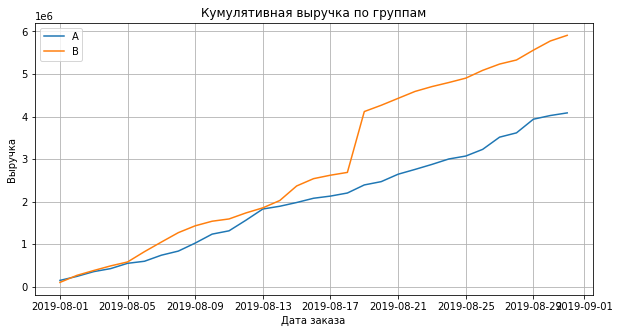

In [19]:
# строим графики

plt.figure(figsize=(10, 5))

plt.plot(cum_revenue_A['date'], cum_revenue_A['revenue'], label='A')
plt.plot(cum_revenue_B['date'], cum_revenue_B['revenue'], label='B')

plt.legend() 
plt.xlabel('Дата заказа')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка по группам')
plt.grid(True)
plt.show()

**Вывод:** По группе А мы наблюдаем достаточно плавное увеличение, а по группе В отмечен резкий скачок. и далее снова плавный рост. Это может отражать увеличение количества заказов или увеличении суммы чека (появление более дорогих заказов).

### График кумулятивного среднего чека по группам

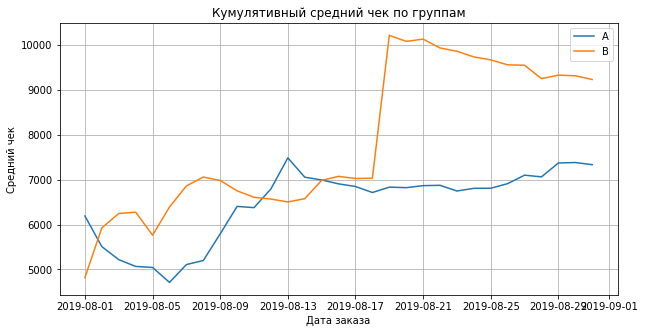

In [20]:
plt.figure(figsize=(10, 5))

plt.plot(cum_revenue_A['date'], cum_revenue_A['revenue']/cum_revenue_A['orders'], label='A')
plt.plot(cum_revenue_B['date'], cum_revenue_B['revenue']/cum_revenue_B['orders'], label='B')

plt.legend() 
plt.xlabel('Дата заказа')
plt.ylabel('Средний чек')
plt.title('Кумулятивный средний чек по группам')
plt.grid(True)
plt.show()

**Вывод:** К концу теста средний чек становится равномерным. По группе А мы наблюдаем ближе к концу равномерный небольшой рост, по группе В резкое увеличение среднего чека, но потом постепенное небольшое снижение. Это говорит о том, что стало больше дорогих заказов.

### График относительного изменения кумулятивного среднего чека группы B к группе A

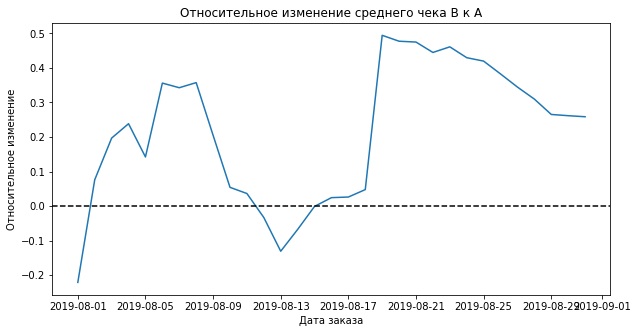

In [21]:
#объединяем данные
merge_cum_revenue = cum_revenue_A.merge(cum_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим график с добавлением оси X

plt.figure(figsize=(10, 5))
plt.plot(merge_cum_revenue['date'], (merge_cum_revenue['revenueB']/merge_cum_revenue['ordersB'])/(
    merge_cum_revenue['revenueA']/merge_cum_revenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('Дата заказа')
plt.ylabel('Относительное изменение')

plt.title('Относительное изменение среднего чека В к А')
plt.show()

**Вывод:** График нестабилен, необходимо проверить выбросы.

### График кумулятивного среднего количества заказов на посетителя по группам

In [22]:
# считаем кумулятивное среднее кол-во заказов
aggregate_data['avg_order'] = aggregate_data['orders']/aggregate_data['visitors']

# данные по группе А
aggregate_data_A = aggregate_data[aggregate_data['group']=='A']

# данные по группе B
aggregate_data_B = aggregate_data[aggregate_data['group']=='B']

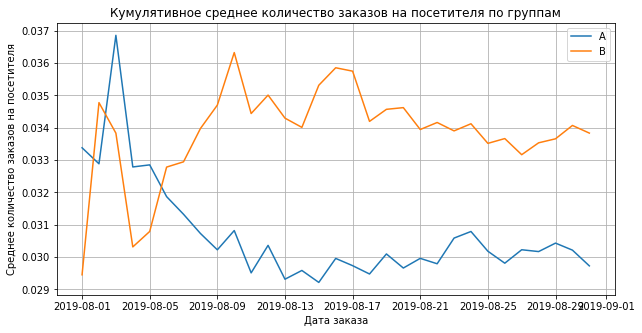

In [23]:
# строим графики

plt.figure(figsize=(10, 5))

plt.plot(aggregate_data_A['date'], aggregate_data_A['avg_order'], label='A')
plt.plot(aggregate_data_B['date'], aggregate_data_B['avg_order'], label='B')

plt.legend() 
plt.xlabel('Дата заказа')
plt.ylabel('Среднее количество заказов на посетителя')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.grid(True)
plt.show()

**Вывод:** В начале теста мы наблюдаем сильные колебания, но далее графики стабилизировались. Группа В существенно выше группы А.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

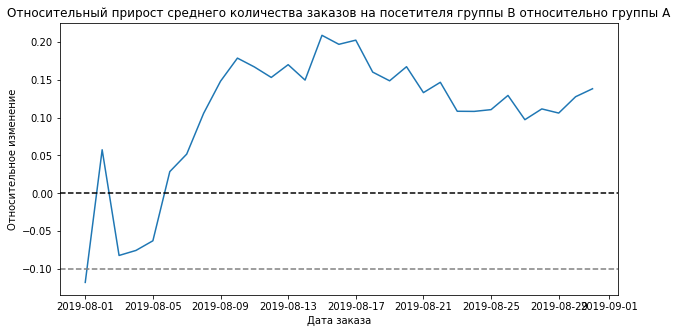

In [24]:
#объединяем данные
merge_cum_avg_order = aggregate_data_A[['date','avg_order']].merge(
    aggregate_data_B[['date','avg_order']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим график с добавлением осей

plt.figure(figsize=(10, 5))
plt.plot(
    merge_cum_avg_order['date'],
    merge_cum_avg_order['avg_orderB']/merge_cum_avg_order['avg_orderA']-1)


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.xlabel('Дата заказа')
plt.ylabel('Относительное изменение')

plt.title('Относительный прирост среднего количества заказов на посетителя группы B относительно группы A')

plt.show()

**Вывод:** В начале теста группа В была хуже, но достаточно быстро перегнала группу А и достаточно стабилизировалась.

### Анализ и визуализация количества заказов по пользователям

Ранее мы наблюдали на графиках резкие скачки и колебания. Это свидетельствует о наличии в данных аномальных значений (выбросов). В частности, в данных могут быть отдельные пользователи, которые сделали много заказов, таким образом оказав влияние на общую картину. Выявим таких пользователей.

In [25]:
# количество заказов по пользователям
orders_by_users = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

orders_by_users.columns = ['users', 'orders']

print(orders_by_users.sort_values(by='orders', ascending=False).head(10)) 

           users  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


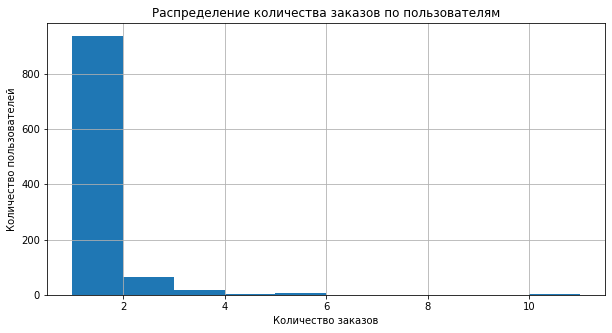

In [26]:
#построим гистограмму

plt.figure(figsize=(10, 5))

plt.hist(orders_by_users['orders']) 

plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.grid(True)

plt.show()

Большинство покупателей заказывали один раз. Но есть доля пользователей с 2-4 заказами, а также небольшое количество пользователей с большим количеством заказов. Для более наглядного вывода построим точеченый график.

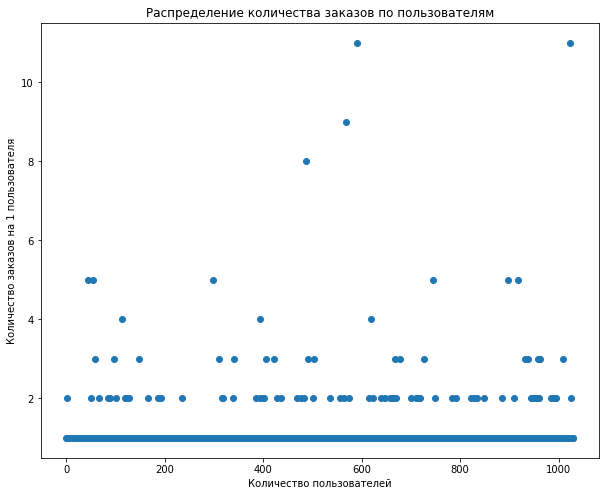

In [27]:
x_values = pd.Series(range(0,len(orders_by_users)))

plt.figure(figsize=(10, 8))

plt.scatter(x_values,orders_by_users['orders'])

plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов на 1 пользователя')
plt.title('Распределение количества заказов по пользователям')

plt.show()

Из графика видно, что есть достаточное количество пользователей с 2-3 заказами, а также доля пользователей с 4 и выше заказами. Для понимания этой доли рассчитаем перцентили.

In [28]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

**Вывод:** Не более 5% пользователей совершали больше 2 заказов и только 1% более 4. Примем за верхнюю границу 4 заказа, отсеив 1% пользователей с большим количеством заказов.

### Анализ и визуализация стоимостей заказов

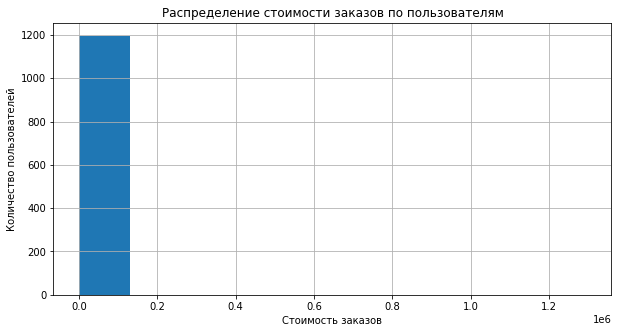

In [29]:
# строим гистограмму

plt.figure(figsize=(10, 5))

plt.hist(orders['revenue']) 

plt.title('Распределение стоимости заказов по пользователям')
plt.xlabel('Стоимость заказов')
plt.ylabel('Количество пользователей')
plt.grid(True)

plt.show()

Из данного графика не видно аномалий, построим точечный график.

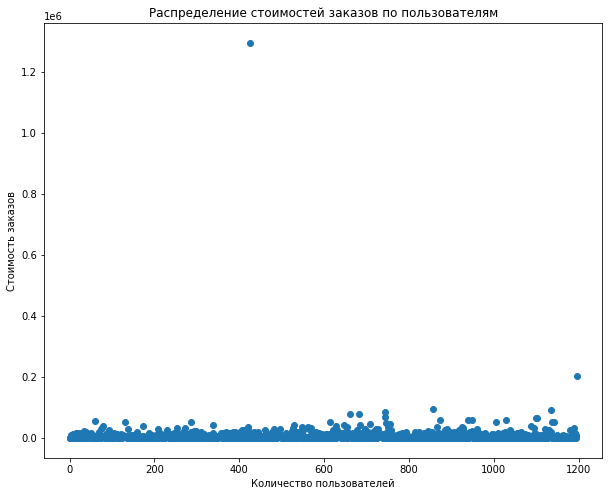

In [30]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(10, 8))

plt.scatter(x_values,orders['revenue'])

plt.title('Распределение стоимостей заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')

plt.show()

Мы видим 2 выбивающихся значения в размере более 200 тыс., а также около 1,3 млн. Рассчитаем перцентили.

In [31]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Вывод:** Не более 5% пользователей совершали заказы на сумму свыше 28000 и только 1% свыше 58233. А заказ в 1,3 млн. скорее всего и стал причиной резкого скачка на графиках. Примем за верхнюю границу сумму в размере 58000.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы:

- Но - различий в среднем количестве заказов на посетителя между группами нет
- Н1 - различия в среднем количестве заказов на посетителя между группами есть

Для проверки гипотез будем использовать критерий Манна-Уитни, так как ранее мы выявили выбросы, особенно крупные по среднему чеку и одно выбивающееся значение может сильно повлиять на результат. Критерий Манна-Уитни как раз позволяет учитывать наличие таких выбросов в данных.

Создадим переменные orders_by_users_A и orders_by_users_B с указанием количества совершённых заказов для пользователей, которые заказывали хотя бы 1 раз.

In [35]:
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_users_A.columns = ['visitorId', 'orders']

orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_users_B.columns = ['visitorId', 'orders'] 

Объявим переменные по группам sample_A и sample_B, с соответствием пользователей и количеством заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [36]:
sample_A = pd.concat(
    [orders_by_users_A['orders'],
     pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - 
                                  len(orders_by_users_A['orders'])),
               name='orders')],axis=0)

sample_B = pd.concat(
    [orders_by_users_B['orders'],
     pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - 
                                  len(orders_by_users_B['orders'])),
               name='orders')],axis=0)

Применим критерий Манна-Уитни, уровень значимости возьмем стандартный alpha=0.05. Рассчитаем относительный прирост среднего числа заказов группы B.

In [37]:
alpha = 0.05
results = st.mannwhitneyu(sample_A, sample_B)
print("P-value:", "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
print("Относительный прирост В к А: {0:.3%}".format(sample_B.mean()/sample_A.mean()-1))

P-value: 0.017
Отвергаем нулевую гипотезу: разница статистически значима
Относительный прирост В к А: 13.808%


**Вывод:** По «сырым» данным P-value меньше 0,05, нулевую гипотезу отвергаем, различия в среднем числе заказов на посетителя групп A и B есть.
Относительный выигрыш группы В 13,8%.

### Расчет статистической значимости различий в среднем чеке заказа на посетителя между группами по «сырым» данным

Сформулируем гипотезы:

- Но - различий в среднем чеке между группами нет
- Н1 - различия в среднем чеке между группами есть

In [38]:
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print("P-value:", "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
print("Относительный прирост В к А: {0:.3%}".format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный прирост В к А: 25.871%


**Вывод:** P-value значительно больше 0.05, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом средний чек группы B значительно выше среднего чека группы A. Из расчетов, проведенных ранее, можно предположить, что на средний чек повлияли отдельные крупные заказы (аномалии).

### Определение количества аномальных пользователей

В предыдущих расчетах мы установили верхние границы по 99 перцентилю, взяв количество заказов - 4 и сумму 58000. Посмотрим сколько таких пользователей всего.

In [39]:
users_many_orders = pd.concat([
        orders_by_users_A[orders_by_users_A['orders'] > np.percentile(orders_by_users['orders'], 99)]['visitorId'],
        orders_by_users_B[orders_by_users_B['orders'] > np.percentile(orders_by_users['orders'], 99)]['visitorId']],
    axis=0)

users_expensive_orders = orders[orders['revenue'] > np.percentile(orders['revenue'],99)]['visitorId']

abnormal_users = (
    pd.concat([users_many_orders, users_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

display(abnormal_users.head())
abnormal_users.shape[0]

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64

15

In [40]:
print("Процент аномальных пользователей: {0:.2%}".format(abnormal_users.count()/orders['visitorId'].nunique()))

Процент аномальных пользователей: 1.45%


Всего 15 аномальных пользователей, что составляет не более 1,5% из общего количества уникальных пользователей.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [41]:
#подготовка данных

sample_A_filtered = pd.concat(
    [orders_by_users_A[
        np.logical_not(orders_by_users_A['visitorId'].isin(abnormal_users))]['orders'],
        pd.Series(0,index=np.arange(
            visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_by_users_A['orders'])),
            name='orders')],
    axis=0)

sample_B_filtered = pd.concat(
    [orders_by_users_B[
        np.logical_not(orders_by_users_B['visitorId'].isin(abnormal_users))]['orders'],
        pd.Series(0,index=np.arange(
            visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_by_users_B['orders'])),
            name='orders')],
    axis=0) 

Применим критерий Манна-Уитни, уровень значимости возьмем стандартный alpha=0.05. Рассчитаем относительный прирост среднего числа заказов группы B.

In [42]:
alpha = 0.05
results = st.mannwhitneyu(sample_A_filtered, sample_B_filtered)
print("P-value:", "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
print("Относительный прирост В к А: {0:.3%}".format(sample_B_filtered.mean()/sample_A_filtered.mean()-1))

P-value: 0.014
Отвергаем нулевую гипотезу: разница статистически значима
Относительный прирост В к А: 15.331%


**Вывод:** Результаты не изменились. По-прежнему различия в группах есть. Относительный прирост увеличился до 15,3%

### Расчет статистической значимости различий в среднем чеке заказа на посетителя между группами по «очищенным» данным

In [43]:
alpha = 0.05
results = st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'],
                          orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue']
                         )

print("P-value:", "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
print("Относительный прирост В к А: {0:.3%}".format(
    orders[np.logical_and(orders['group'] == 'B',
                          np.logical_not(orders['visitorId'].isin(abnormal_users)))
          ]['revenue'].mean() / 
    orders[np.logical_and(orders['group'] == 'A',
                          np.logical_not(orders['visitorId'].isin(abnormal_users)))
        ]['revenue'].mean() - 1
    ))

P-value: 0.851
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный прирост В к А: -0.575%


**Вывод:** P-value значительно больше 0.05, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. По очищенным данным мы видим, что разницы в средних чеках по группам практически нет (после исключения очень крупных сумм).

### Принятие решения по результатам теста

Мы получили следующие результаты:

- Есть статистически значимое различие по среднему количеству заказов на посетителя между группами как по сырым, так и по очищенным данным;
- Нет статистически значимого различия по среднему чеку между группами как по сырым, так и по очищенным данным. Наблюдаемый относительный прирост по группе В после фильтрации ушел, на показатель данного прироста в "сырых данных" повлияли редкие очень дорогие заказы;
- Графики различия количества заказов между группами сообщает, что результаты группы B значительно лучше группы A, к тому же к концу теста имеют еще небольшую тенденцию к росту.

Исходя из этого следует **остановить тест, зафиксировав победу группы В.**